<a href="https://colab.research.google.com/github/mnaufaln/Data-Analytics-Portfolio/blob/main/Customer_Retention_Analysis_for_E_Commerce_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Title

Customer Retention Analysis for E-Commerce Company


---


Project Objective


1.   Analyze Customer Behavior: Identify patterns and trends in customer behavior to understand the factors influencing customer retention.
2.   Predict Churn Rate: Develop a predictive model to identify customers at risk of churning.
3. Evaluate Retention Strategies: Assess the effectiveness of current retention strategies and recommend improvements.
4. Increase Customer Lifetime Value (CLV): Suggest actionable insights to increase the overall CLV through targeted interventions.

Problem Statement


---


The e-commerce company has been experiencing a decline in customer retention rates over the past year. Despite various marketing efforts, the churn rate remains high, impacting the company's revenue and growth. The company needs to understand the underlying reasons for customer churn and develop data-driven strategies to retain customers effectively.

Column Details

*   CustomerID: This column uniquely identifies each customer and is useful for tracking individual customer records.
*   Gender: This column provides demographic information about the customer base, which can be useful for segmentation and targeted marketing.
*   Age: Age information helps in understanding the age distribution of the customer base and can be used to tailor marketing strategies accordingly.
*  Annual_Income: This column helps in analyzing the economic status of customers and can be used to segment customers based on their spending power.


*   Purchase_History: This categorical variable indicates how often a customer makes purchases, which can be an important factor in understanding customer loyalty and engagement.

*   Last_Purchase_Date: This date helps in determining recency, which is a key factor in customer segmentation models like RFM (Recency, Frequency, Monetary).
*   Total_Spent: This column indicates the total expenditure of a customer and is useful for calculating metrics like Customer Lifetime Value (CLV).


*   Churn: This binary column indicates whether a customer has churned, making it essential for predictive modeling and retention analysis.














# Import Library

In [ ]:
import pandas as pd

In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/sample_data/ecommerce_customer_data.csv')


# Data Preprocessing


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          100 non-null    int64 
 1   Gender              100 non-null    object
 2   Age                 100 non-null    int64 
 3   Annual_Income       100 non-null    int64 
 4   Purchase_History    100 non-null    object
 5   Last_Purchase_Date  100 non-null    object
 6   Total_Spent         100 non-null    int64 
 7   Churn               100 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


In [ ]:
df.sample(5)

,CustomerID,Gender,Age,Annual_Income,Purchase_History,Last_Purchase_Date,Total_Spent,Churn
24,25,Male,52,42111,Occasional,2022-01-25,1937,1
75,76,Female,21,146428,Frequent,2022-03-17,1500,0
45,46,Male,37,27131,Frequent,2022-02-15,4422,1
42,43,Female,56,93331,Frequent,2022-02-12,2246,1
62,63,Female,62,25331,Occasional,2022-03-04,1455,1


In [ ]:
df.describe()

,CustomerID,Age,Annual_Income,Total_Spent,Churn
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,45.240000,80678.120000,2671.820000,0.530000
std,29.011492,13.504298,39219.866264,1446.916899,0.501614
min,1.000000,18.000000,20342.000000,182.000000,0.000000
25%,25.750000,36.000000,45600.750000,1484.250000,0.000000
50%,50.500000,46.000000,82116.500000,2722.000000,1.000000
75%,75.250000,56.000000,112451.250000,3961.250000,1.000000
max,100.000000,69.000000,148803.000000,4985.000000,1.000000


Checking Missing Data

In [ ]:
# Check for missing values
print(df.isnull().sum())

CustomerID            0
Gender                0
Age                   0
Annual_Income         0
Purchase_History      0
Last_Purchase_Date    0
Total_Spent           0
Churn                 0
dtype: int64


Ensure "Last_Purchase_Date" is a datetime type

In [ ]:
# Ensure 'Last_Purchase_Date' is a datetime type
df['Last_Purchase_Date'] = pd.to_datetime(df['Last_Purchase_Date'])

#check the data info
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          100 non-null    int64         
 1   Gender              100 non-null    object        
 2   Age                 100 non-null    int64         
 3   Annual_Income       100 non-null    int64         
 4   Purchase_History    100 non-null    object        
 5   Last_Purchase_Date  100 non-null    datetime64[ns]
 6   Total_Spent         100 non-null    int64         
 7   Churn               100 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 6.4+ KB


None

In [ ]:
# Convert the Age column to integer
df['Age'] = df['Age'].astype(int)

# Verify the conversion
print("Data types after conversion:\n", df.dtypes)
display(df.head())

Data types after conversion:
 CustomerID                     int64
Gender                        object
Age                            int64
Annual_Income                  int64
Purchase_History              object
Last_Purchase_Date    datetime64[ns]
Total_Spent                    int64
Churn                          int64
dtype: object


,CustomerID,Gender,Age,Annual_Income,Purchase_History,Last_Purchase_Date,Total_Spent,Churn
0,1,Female,30,130141,Frequent,2022-01-01,3826,0
1,2,Female,44,73257,Occasional,2022-01-02,330,0
2,3,Female,54,63663,Rare,2022-01-03,2772,0
3,4,Female,47,25727,Rare,2022-01-04,2426,0
4,5,Male,30,50810,Frequent,2022-01-05,2672,1


In [ ]:
df.describe()

,CustomerID,Age,Annual_Income,Last_Purchase_Date,Total_Spent,Churn
count,100.000000,100.000000,100.000000,100,100.000000,100.000000
mean,50.500000,45.240000,80678.120000,2022-02-19 12:00:00,2671.820000,0.530000
min,1.000000,18.000000,20342.000000,2022-01-01 00:00:00,182.000000,0.000000
25%,25.750000,36.000000,45600.750000,2022-01-25 18:00:00,1484.250000,0.000000
50%,50.500000,46.000000,82116.500000,2022-02-19 12:00:00,2722.000000,1.000000
75%,75.250000,56.000000,112451.250000,2022-03-16 06:00:00,3961.250000,1.000000
max,100.000000,69.000000,148803.000000,2022-04-10 00:00:00,4985.000000,1.000000
std,29.011492,13.504298,39219.866264,NaN,1446.916899,0.501614


## Exploratory Data Analysis (EDA)

### Distribution of Age and Annual Income:

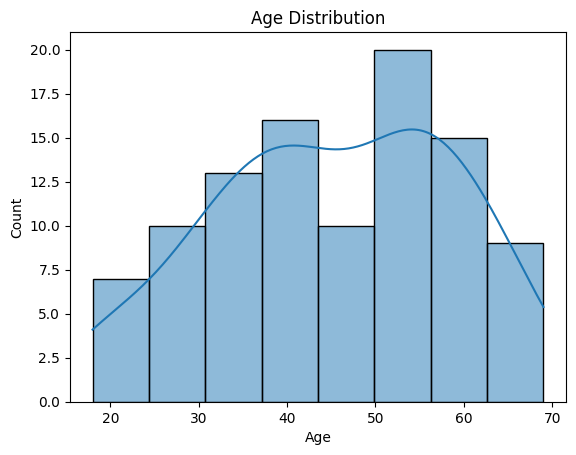

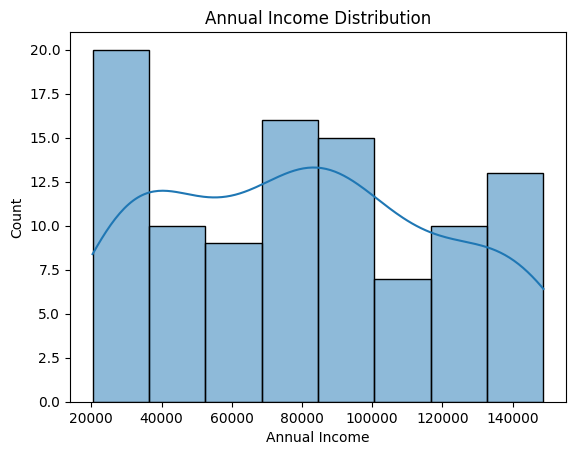

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Age distribution
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

# Plot Annual Income distribution
sns.histplot(df['Annual_Income'], kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.show()


### Purchase History and Total Spent

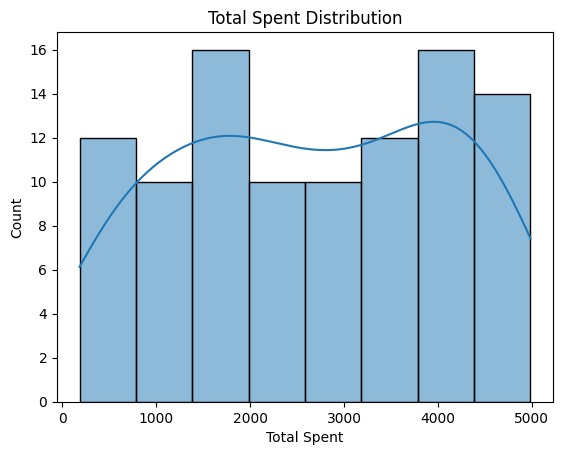

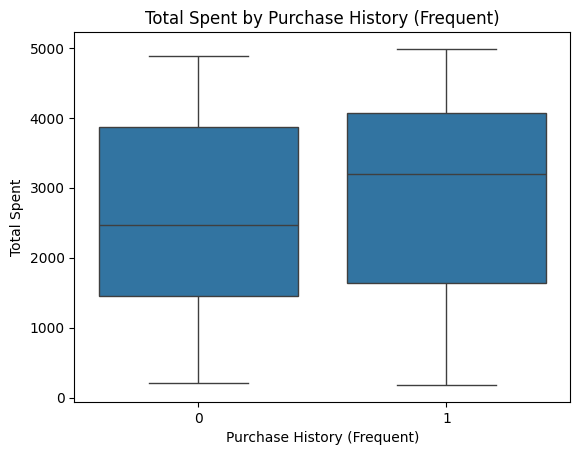

In [ ]:
# Plot Total Spent distribution
sns.histplot(df['Total_Spent'], kde=True)
plt.title('Total Spent Distribution')
plt.xlabel('Total Spent')
plt.show()

# Create 'Purchase_History_Frequent' column
df['Purchase_History_Frequent'] = df['Purchase_History'].apply(lambda x: 1 if x == 'Frequent' else 0)

# Create the box plot
sns.boxplot(x='Purchase_History_Frequent', y='Total_Spent', data=df)
plt.title('Total Spent by Purchase History (Frequent)')
plt.xlabel('Purchase History (Frequent)')
plt.ylabel('Total Spent')
plt.show()


## Analyzing Churn

### 1. Calculate Churn Rate


The churn rate is the percentage of customers who have stopped using the service over a given period.

Code Explanation:

We use the mean() function to calculate the churn rate because the Churn column contains binary values (0 for retained, 1 for churned).

In [ ]:
# Calculate churn rate
churn_rate = df['Churn'].mean()
print(f'Churn Rate: {churn_rate:.2%}')


Churn Rate: 53.00%


### 2. Compare Characteristics of Churned vs. Retained Customers

We group the data by the Churn column to compare the characteristics (like age, total spent, etc.) of churned vs. retained customers.

Code Explanation:

The groupby('Churn').mean() method groups the data by the Churn column and calculates the mean of other columns for each group.

In [ ]:
#import Numpy
import numpy as np

# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Group by Churn and calculate mean values for numeric columns
churn_analysis = df.groupby('Churn')[numeric_columns].mean()
display(churn_analysis)


,CustomerID,Age,Annual_Income,Total_Spent,Churn,Purchase_History_Frequent
Churn,,,,,,
0,48.872340,44.063830,85218.680851,2438.851064,0.0,0.319149
1,51.943396,46.283019,76651.584906,2878.415094,1.0,0.283019


### Visulize Churn

Visualizations help us understand the data better. We'll create a few plots to visualize the relationship between different features and churn.

Correlation Heatmap:

- A correlation heatmap shows the relationship between different features.

Code Explanation:

- We use sns.heatmap() to create a heatmap of the correlations.

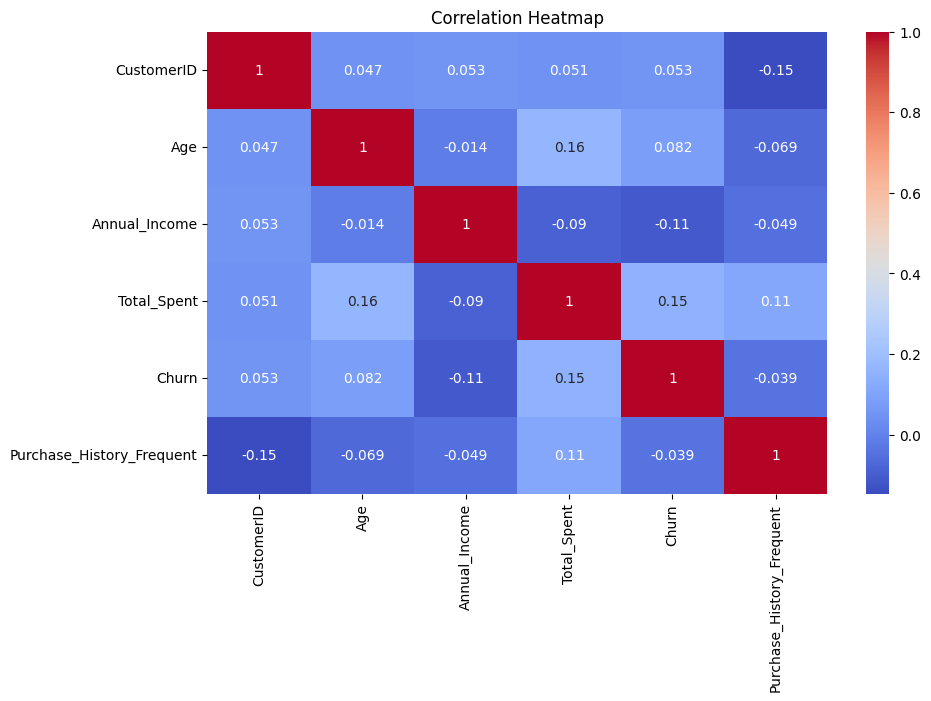

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap to see relationship between features and churn
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Key Takeaways

- Weak Correlations: Most of the correlations are relatively weak (close to 0), indicating that there aren't strong linear relationships between the variables.
- Slight Patterns: There are slight patterns such as older customers spending more and higher income leading to slightly lower churn, but these are not strong effects.

Actions Based on Insights

1. Targeted Marketing:

- Older customers and those who spend more might be targeted with retention campaigns, considering they show a slightly higher likelihood to churn.
- High-income customers could be given special incentives to prevent churn since they are slightly less likely to churn.

2. Further Analysis:

- More detailed analysis, possibly using non-linear methods, might be necessary to uncover deeper insights since linear correlations are weak.
- Segmentation and clustering might help identify distinct customer groups with unique behaviors.

## Customer Segmentation (RFM Analysis)

What is RFM Analysis?
RFM stands for Recency, Frequency, and Monetary:

- Recency (R): How recently a customer made a purchase.
- Frequency (F): How often a customer makes a purchase.
- Monetary (M): How much money a customer spends on purchases.

By analyzing these three metrics, we can segment customers into different groups and target them with specific marketing strategies.

### 1. Calculate Recency
Recency is calculated as the number of days since the last purchase.

In [ ]:
# Find the earliest and latest dates in the dataset
earliest_date = df['Last_Purchase_Date'].min()
latest_date = df['Last_Purchase_Date'].max()

print(f'Earliest Date: {earliest_date}')
print(f'Latest Date: {latest_date}')

Earliest Date: 2022-01-01 00:00:00
Latest Date: 2022-04-10 00:00:00


In [ ]:
# Define the reference date (usually the most recent date in the dataset)
reference_date = latest_date

# Calculate Recency
df['Recency'] = (reference_date - df['Last_Purchase_Date']).dt.days

# Display the first few rows to check the Recency calculation
display(df[['CustomerID', 'Last_Purchase_Date', 'Recency']].head())

,CustomerID,Last_Purchase_Date,Recency
0,1,2022-01-01,99
1,2,2022-01-02,98
2,3,2022-01-03,97
3,4,2022-01-04,96
4,5,2022-01-05,95


### Calculate Frequency

Frequency is the total number of purchases made by each customer. In this dataset, we don't have individual purchase records, so we'll assume that Purchase_History indirectly indicates frequency.

In [ ]:
# We assume that Purchase_History can be used as a proxy for Frequency.
# You can assign numerical values to 'Frequent', 'Occasional', and 'Rare' as follows:
frequency_mapping = {'Frequent': 3, 'Occasional': 2, 'Rare': 1}
df['Frequency'] = df['Purchase_History'].map(frequency_mapping)

# Display the first few rows to check the Frequency calculation
display(df[['CustomerID', 'Purchase_History', 'Frequency']].head())


,CustomerID,Purchase_History,Frequency
0,1,Frequent,3
1,2,Occasional,2
2,3,Rare,1
3,4,Rare,1
4,5,Frequent,3


### Calculate Monetary Value
Monetary value is the total amount spent by each customer.

In [ ]:
# The 'Total_Spent' column already provides the monetary value.
# We don't need to do any additional calculations.

# Display the first few rows to check the Monetary value
display(df[['CustomerID', 'Total_Spent']].head())


,CustomerID,Total_Spent
0,1,3826
1,2,330
2,3,2772
3,4,2426
4,5,2672


### Assign Scores
To standardize the RFM values, we can assign scores to each metric. Typically, we use a scale of 1 to 5, where higher values are better for Frequency and Monetary, and lower values are better for Recency.

In [ ]:
# Assign scores based on quantiles
df['R_Score'] = pd.qcut(df['Recency'], 5, labels=[5, 4, 3, 2, 1])
df['F_Score'] = pd.qcut(df['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
df['M_Score'] = pd.qcut(df['Total_Spent'], 5, labels=[1, 2, 3, 4, 5])

# Display the first few rows to check the RFM scores
display(df[['CustomerID', 'Recency', 'R_Score', 'Frequency', 'F_Score', 'Total_Spent', 'M_Score']].head())


,CustomerID,Recency,R_Score,Frequency,F_Score,Total_Spent,M_Score
0,1,99,1,3,4,3826,4
1,2,98,1,2,2,330,1
2,3,97,1,1,1,2772,3
3,4,96,1,1,1,2426,3
4,5,95,1,3,4,2672,3


### Segment Customers
Combine the R, F, and M scores to create a composite RFM score.

In [ ]:
# Combine R, F, and M scores into a single RFM score
df['RFM_Score'] = df['R_Score'].astype(str) + df['F_Score'].astype(str) + df['M_Score'].astype(str)

# Display the first few rows to check the RFM segmentation
display(df[['CustomerID', 'RFM_Score']].head())


,CustomerID,RFM_Score
0,1,144
1,2,121
2,3,113
3,4,113
4,5,143


## Customer Segmentation Using K-Means Clustering

- What is K-Means Clustering?

  K-Means clustering is an unsupervised machine learning algorithm that groups data points into K clusters, where each data point belongs to the cluster with the nearest mean. The goal is to partition the data into clusters such that the points within each cluster are similar to each other and different from points in other clusters.

- Steps for K-Means Clustering
    - Standardize the Data: Ensure all variables have a similar scale.
    - Apply K-Means Algorithm: Group the data into K clusters.
    - Interpret the Clusters: Understand the characteristics of each cluster.

### 1. Standardize the Data

Standardizing the data means scaling the features so that they have a mean of 0 and a standard deviation of 1. This step is important because it ensures that each feature contributes equally to the distance calculations used by K-Means.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the RFM columns
rfm_features = df[['Recency', 'Frequency', 'Total_Spent']]

# Standardize the features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Check the scaled data
display(rfm_scaled[:5])

array([[ 1.71481604e+00,  1.29327850e+00,  8.01700876e-01],
       [ 1.68017329e+00,  1.28047376e-02, -1.62664328e+00],
       [ 1.64553055e+00, -1.26766902e+00,  6.95856745e-02],
       [ 1.61088780e+00, -1.26766902e+00, -1.70748158e-01],
       [ 1.57624505e+00,  1.29327850e+00,  1.25029162e-04]])

### 2. Apply K-Means Algorithm
Next, we apply the K-Means algorithm to the standardized data. We need to choose the number of clusters (K). A common method to determine the optimal number of clusters is the Elbow Method.

Elbow Method:

- Calculate the sum of squared distances from each point to its assigned cluster center for different values of K.
- Plot these values and look for an "elbow" point where the sum of squared distances starts to decrease more slowly.

#### Code for Elbow Method

Elbow Method:

- Calculate the sum of squared distances from each point to its assigned cluster center for different values of K.
- Plot these values and look for an "elbow" point where the sum of squared distances starts to decrease more slowly.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

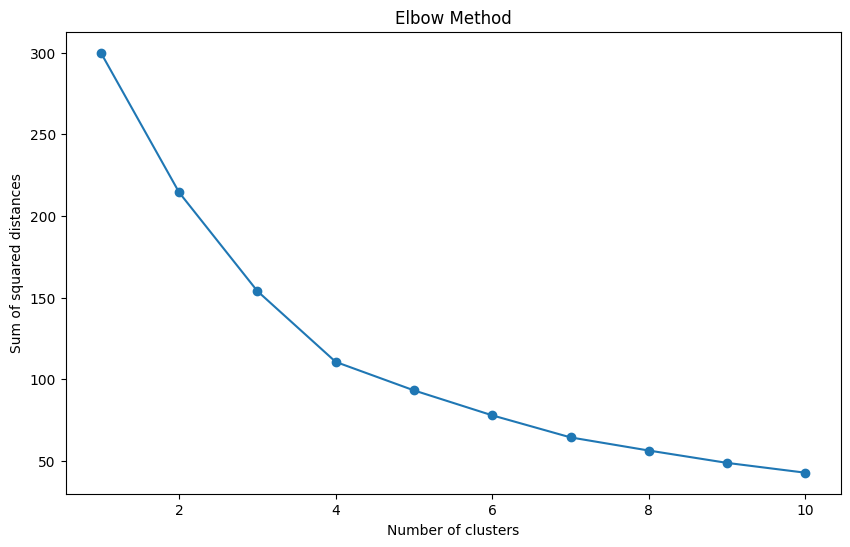

In [ ]:
from sklearn.cluster import KMeans

# Calculate the sum of squared distances for different values of K
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()


### Apply K-Means and Intepret Cluster

In [ ]:
# Choose the optimal number of clusters
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Ensure only numeric columns are included in cluster analysis
numeric_columns = ['Recency', 'Frequency', 'Total_Spent', 'Cluster']

# Calculate mean values of RFM features for each cluster
cluster_analysis = df[numeric_columns].groupby('Cluster').mean()
display(cluster_analysis)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Recency,Frequency,Total_Spent
Cluster,,,
0,38.086957,2.434783,1016.347826
1,22.533333,1.400000,3588.833333
2,66.260870,2.869565,3847.652174
3,78.083333,1.458333,1985.208333


# Recommendations and Insights


---


Cluster 0: Occasional Moderate-Spenders

- Recency: 38.09 days
    - Customers in this cluster made their last purchase approximately 38 days ago.

- Frequency: 2.43 purchases
    - These customers make purchases relatively often, averaging about 2.43 purchases.

- Total Spent: $1016.35

    - These customers spend a moderate amount, with an average total expenditure of $1016.35.

Insights:

- These customers are relatively engaged, making purchases every month or so.
- Their spending is moderate, indicating potential for upselling or cross-selling.

Actions:

- Re-engagement Campaigns: Offer special discounts or loyalty rewards to encourage more frequent purchases.
- Upselling: Highlight higher-value products or complementary products that might interest them.
---
Cluster 1: Recent High-Spenders

- Recency: 22.53 days

    - Customers in this cluster made their last purchase approximately 22 days ago, making them relatively recent purchasers.

- Frequency: 1.40 purchases
    - These customers do not purchase frequently, averaging about 1.4 purchases.
- Total Spent: $3588.83
    - These customers spend a significant amount, with an average total expenditure of $3588.83.

Insights:

- These are high-value customers who have recently made purchases.
- Their low purchase frequency suggests that when they do purchase, they spend a lot.

Actions:

- Exclusive Promotions: Offer exclusive, high-value promotions to incentivize these customers to purchase more frequently.
- Premium Product Highlight: Showcase premium products and services that match their spending habits.
---
Cluster 2: Frequent High-Spenders
- Recency: 66.26 days
  - Customers in this cluster made their last purchase approximately 66 days ago.
- Frequency: 2.87 purchases
  - These customers purchase quite frequently, averaging about 2.87 purchases.

- Total Spent: $3847.65

  - These customers spend a significant amount, with an average total expenditure of $3847.65.

Insights:

- These customers are valuable due to their high frequency and spending.
- Despite their high frequency, they haven't made a purchase recently.

Actions:

- Retention Strategies: Focus on retention strategies such as personalized offers and loyalty programs to re-engage these customers.

- Personalized Offers: Provide personalized offers based on their past purchase history to bring them back.

---

Cluster 3: Infrequent Moderate-Spenders

- Recency: 78.08 days
  - Customers in this cluster made their last purchase approximately 78 days ago.

- Frequency: 1.46 purchases
  - These customers make purchases infrequently, averaging about 1.46 purchases.

- Total Spent: $1985.21
  
  - These customers spend a moderate amount, with an average total expenditure of $1985.21.

Insights:

- These customers are at risk of churning due to their infrequent purchases and long time since last purchase.
- Their moderate spending indicates they have potential for increased engagement.

Actions:

- Reactivation Campaigns: Implement reactivation campaigns with attractive offers to re-engage these customers.
- Time-Limited Discounts: Offer time-limited discounts to create a sense of urgency and encourage purchases.

---
Summary:

Based on the RFM analysis and clustering, we can derive the following recommendations for targeted marketing strategies:

- Cluster 0 (Occasional Moderate-Spenders):

    - Re-engagement Campaigns: Encourage more frequent purchases with loyalty rewards and discounts.
    - Upselling: Highlight higher-value or complementary products.

- Cluster 1 (Recent High-Spenders):

    - Exclusive Promotions: Incentivize more frequent purchases with high-value promotions.
    - Premium Product Highlight: Showcase premium products to match their spending habits.

- Cluster 2 (Frequent High-Spenders):

    - Retention Strategies: Focus on personalized offers and loyalty programs to retain these valuable customers.
    - Personalized Offers: Re-engage customers with personalized offers based on past
    purchase history.

- Cluster 3 (Infrequent Moderate-Spenders):

    - Reactivation Campaigns: Implement campaigns with attractive offers to re-engage these customers.
    - Time-Limited Discounts: Create a sense of urgency with time-limited discounts to encourage purchases.

These strategies can help optimize customer engagement, retention, and overall revenue by addressing the specific needs and behaviors of each customer segment.